# Estadistica Aplicada

Sesion 15, 25 de septiembre

Jesus Adrian Cordero Hernandez 1952778

GPO 41

In [2]:
## 1-Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
## Librerias especializadas
from statsmodels.tsa.seasonal import seasonal_decompose
## tamaño graficas (largo,alto)
plt.rcParams['figure.figsize']=(10,6)

In [7]:
## Datos
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month', parse_dates=True)
pasajeros

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
pasajeros = pasajeros.rename(columns={'Thousands of Passengers': 'miles de pasajeros'})

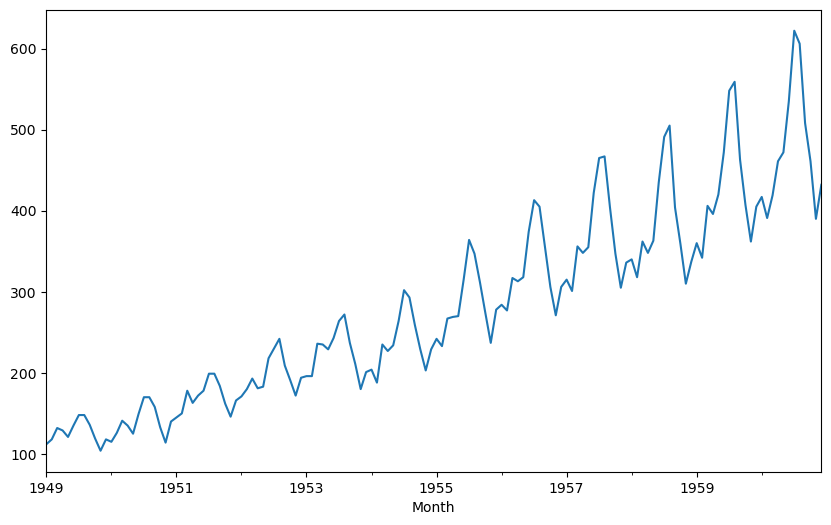

In [17]:
pasajeros['miles de pasajeros'].plot();

Esta serie tiene tendencia creciente y un marcado componente estacional.

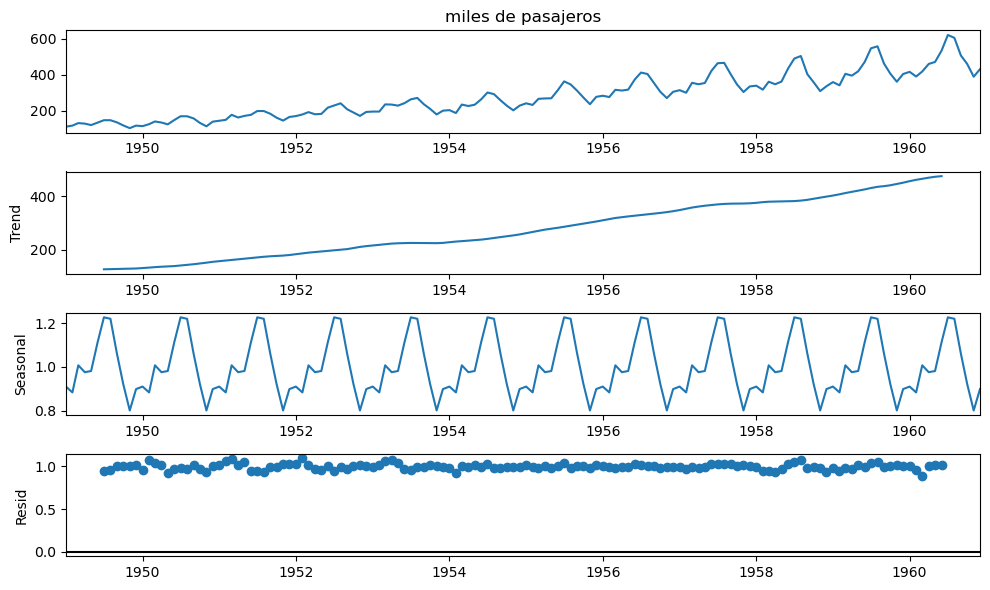

In [21]:
## Vamos a descomponer la serie en 3 elementos 
## 1 tendencia ciclo
## 2 estacional
## 3 irregular
ets1 = seasonal_decompose(pasajeros['miles de pasajeros'], model='mult')
ets1.plot();

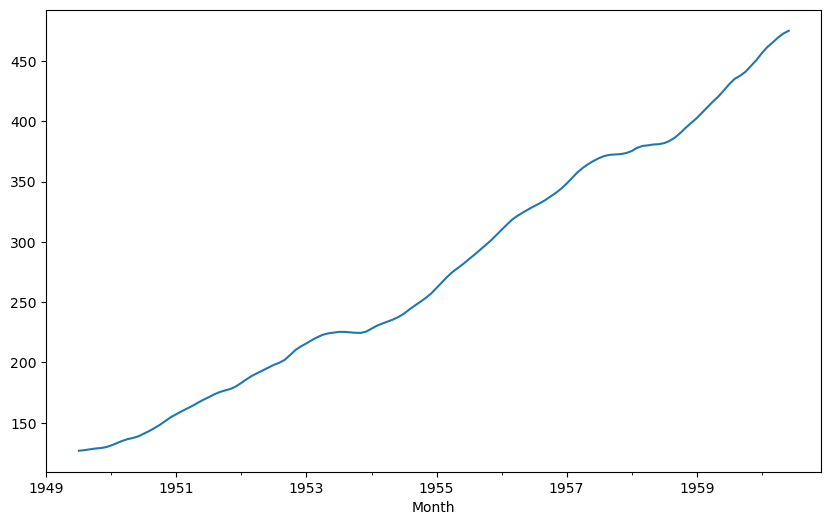

In [27]:
## tendencia-ciclo
ets1.trend.head()
## Graficar tendencia-ciclo
ets1.trend.plot();

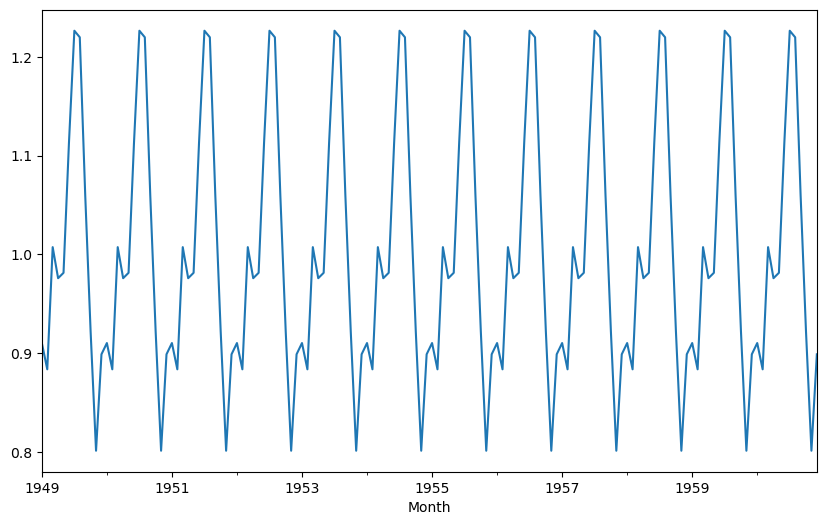

In [28]:
## componente estacional
ets1.seasonal.head(12)
## Graficar componente estacional
ets1.seasonal.plot();

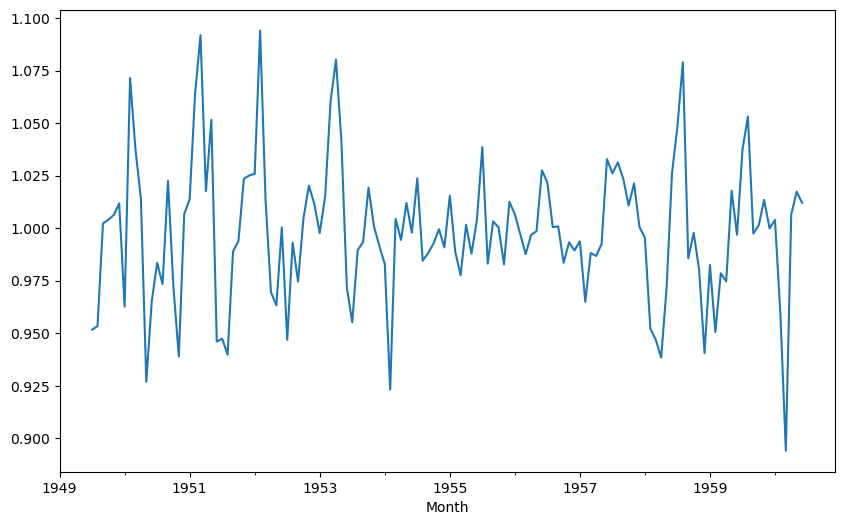

In [29]:
## componente irregular
ets1.resid.head()
## Graficar componente irregular
ets1.resid.plot();

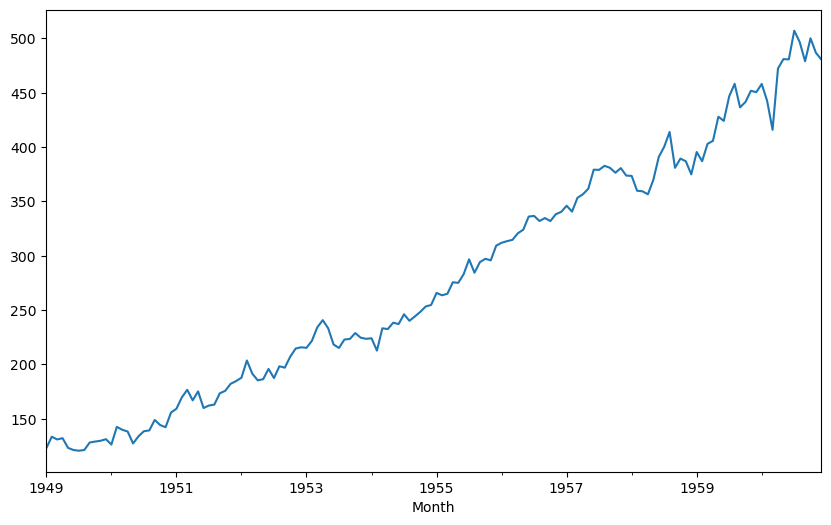

In [32]:
## desestacionalizar 
pasajeros['desestacionalizada'] = pasajeros['miles de pasajeros']/ets1.seasonal
pasajeros['desestacionalizada'].plot();

In [36]:
pasajeros.to_excel('pasajeross.xlsx')